In [412]:
# Given data is in the form of docs with words. It needs to be converted into a structure with each document having the 
# frequency of the top k words and the class of the data

# X = rows : document list features: top k words and their frequency
# Y = type of document

# First step in this is to build a dictionary out of all the words in the given documents
# I'll be selecting only the top k(1000/2000) words as part of features to train the model


#For the dataset download from : http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups


## Step 1 Making a dictionary

In [94]:
import nltk
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt

In [65]:
word_list = []

In [39]:
import glob
folder_list = (glob.glob("20_newsgroups\\*"))


In [68]:
for folder in folder_list:
    file_list = glob.glob(folder + "\\*")
    for file in file_list:
        doc = open(file, "r")
        tokenizer = nltk.RegexpTokenizer(r"\w+")
        a = (doc.read())
        new_words = tokenizer.tokenize(a)
        word_list.extend(new_words)
        doc.close()

In [193]:
for folder in folder_list:
    file_list = glob.glob(folder + "\\*")
    for file in file_list:
        doc = open(file, "r")
        tokenizer = nltk.RegexpTokenizer(r"\w+")
        a = (doc.read())
        new_words = tokenizer.tokenize(a)
        word_list.extend(new_words)
        doc.close()

['Xref',
 'cantaloupe',
 'srv',
 'cs',
 'cmu',
 'edu',
 'alt',
 'atheism',
 '49960',
 'alt',
 'atheism',
 'moderated',
 '713',
 'news',
 'answers',
 '7054',
 'alt',
 'answers',
 '126',
 'Path',
 'cantaloupe',
 'srv',
 'cs',
 'cmu',
 'edu',
 'crabapple',
 'srv',
 'cs',
 'cmu',
 'edu',
 'bb3',
 'andrew',
 'cmu',
 'edu',
 'news',
 'sei',
 'cmu',
 'edu',
 'cis',
 'ohio',
 'state',
 'edu',
 'magnus',
 'acs',
 'ohio',
 'state',
 'edu',
 'usenet',
 'ins',
 'cwru',
 'edu',
 'agate',
 'spool',
 'mu',
 'edu',
 'uunet',
 'pipex',
 'ibmpcug',
 'mantis',
 'mathew',
 'From',
 'mathew',
 'mathew',
 'mantis',
 'co',
 'uk',
 'Newsgroups',
 'alt',
 'atheism',
 'alt',
 'atheism',
 'moderated',
 'news',
 'answers',
 'alt',
 'answers',
 'Subject',
 'Alt',
 'Atheism',
 'FAQ',
 'Atheist',
 'Resources',
 'Summary',
 'Books',
 'addresses',
 'music',
 'anything',
 'related',
 'to',
 'atheism',
 'Keywords',
 'FAQ',
 'atheism',
 'books',
 'music',
 'fiction',
 'addresses',
 'contacts',
 'Message',
 'ID',
 '199303

In [185]:
i = 0 
Y = []
for folder in folder_list:
    file_list = glob.glob(folder + "\\*")
    for file in range(len(file_list)):
        Y.append(i)
    i += 1
    

In [190]:
Y = np.array(Y)

In [74]:
filtered_word_list = [w for w in word_list if not w in stop_words] 


In [76]:
len(word_list)

7778430

In [77]:
len(filtered_word_list)

5712962

In [78]:
word_freq = {}

In [80]:
for word in filtered_word_list:
    if(word in word_freq):
        word_freq[word] += 1
    else:
        word_freq[word] = 1

In [82]:
import operator

word_freq_sorted = sorted(word_freq.items(),key=operator.itemgetter(1),reverse=True)


In [161]:
word_freq_sorted_dict = {}
k = 3000

for word in word_freq_sorted[0:k]:
    word_freq_sorted_dict[word[0]] = word[1]

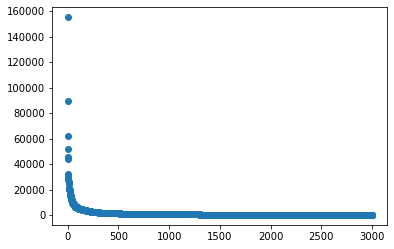

In [162]:
plt.scatter(np.arange(0 , len(word_freq_sorted_dict)), list(word_freq_sorted_dict.values()))

In [163]:
top_k_words = list(word_freq_sorted_dict.keys())

In [164]:
len(top_k_words)

3000

In [ ]:
### creating the dataset

In [205]:
dataset = []
for folder in folder_list:
    file_list = glob.glob(folder + "\\*")
    for file in file_list:
        doc = open(file, "r")
        tokenizer = nltk.RegexpTokenizer(r"\w+")
        a = (doc.read())
        new_words = tokenizer.tokenize(a)
        dataset.append(' '.join(new_words))
        doc.close()

In [208]:
len(dataset)

19998

In [212]:
X = np.zeros((len(dataset), len(top_k_words)))

In [247]:
for data in range(len(dataset)):
    word_list = dataset[data].split(' ')
    for word in word_list:
        if word in top_k_words:
            X[data][top_k_words.index(word)] +=1
    if(data%500 == 0):
        print(data)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500


In [268]:
X, Y

(array([[40.,  0.,  0., ...,  0.,  0.,  0.],
        [15., 27.,  0., ...,  3.,  0.,  0.],
        [21., 21.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 8.,  1.,  0., ...,  0.,  0.,  0.],
        [ 8.,  4.,  0., ...,  0.,  0.,  0.],
        [ 9.,  2.,  0., ...,  0.,  0.,  0.]]),
 array([ 0,  0,  0, ..., 19, 19, 19]))

# Predict Function

In [ ]:
# c1 is a category
# p(y = c1/ d = dtest) = p(d = dtest/y =c1)*p(c1)
# p(c1) is easy -> (y == c1)/len(Y)
# for the first part just multiply the probabilities of each word in doc dtest, if any word is nto preset
# I'll just ignore it for now


#the probability function takes a lot of time to run also seems to classify all classes as 5 for no particular reason

In [378]:
def probability(X, Y, word_index_list, current_class):
    output = np.log((Y == current_class).sum()) - np.log(len(Y))
    pro_den = np.log(X[Y == current_class].sum())

    for i in word_index_list:
        pro_num = (X[Y == current_class][: , i].sum())
        if (pro_num > 0):
            pro_num = np.log(pro_num)
            output += (pro_num - pro_den)
    return output

In [370]:
def predictSinglePoint(X, Y, word_index_list):
    classes = set(Y)
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        p_current_class = probability(X, Y, word_index_list, current_class)
        print(p_current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

In [371]:
def predict(X, Y, X_test):
    y_pred = []
    for x in X_test:
            
        word_index_list = []
        for word in x:
            if word in top_k_words:
                word_index_list.append(top_k_words.index(word))
        x_class = predictSinglePoint(X, Y, word_index_list)
        y_pred.append(x_class)
    return y_pred

In [411]:
#just checking to see if class 5 stands out in any way. Seems fine
for current_class in set(Y):
    print(X[Y == current_class].sum())

551272.0
357076.0
698368.0
316068.0
295486.0
405234.0
264134.0
308868.0
282016.0
320692.0
387902.0
427368.0
294860.0
197156.0
183428.0
218064.0
213391.0
263723.0
245631.0
216663.0
